# Hierarichal Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#Import iris dataset
iris = datasets.load_iris()

In [3]:
data = pd.DataFrame(iris.data)

In [4]:
data.columns = iris.feature_names

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
x_scaled = scaler.fit_transform(data)

In [9]:
x_scaled.shape

(150, 4)

In [10]:
#Convert to 2d using PCA
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [13]:
pca_scaled = pca.fit_transform(x_scaled)

In [15]:
pca_scaled.shape

(150, 2)

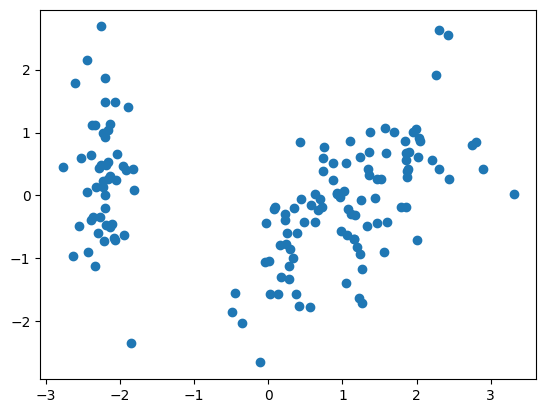

In [16]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

In [17]:
#agglomerative Clustering
#to construct a dendogram
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Eucledian Distance')

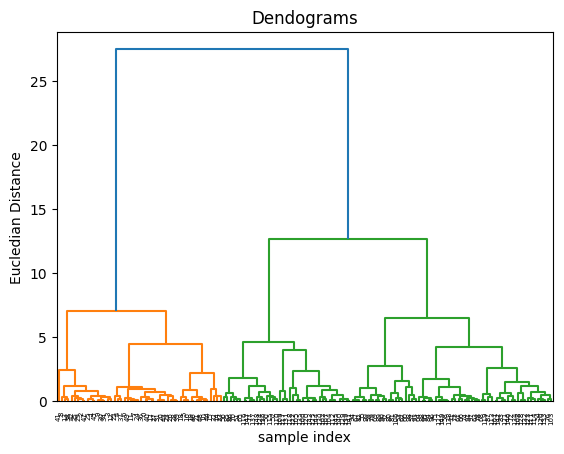

In [21]:
#plot the dendogram
plt.Figure(figsize=(10,15))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.xlabel('sample index')
plt.ylabel('Eucledian Distance')

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')

In [25]:
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [26]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

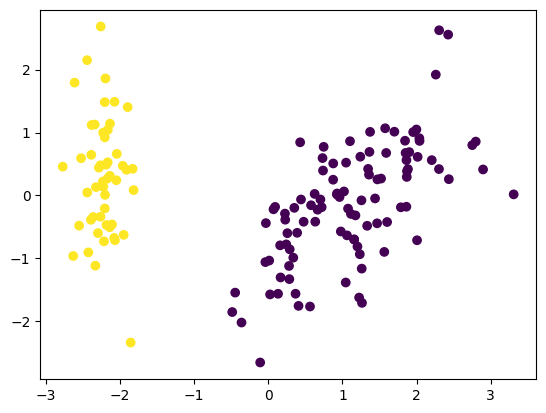

In [27]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
sillhouette_coefficient = []

In [30]:
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score = silhouette_score(x_scaled,agglo.labels_)
    sillhouette_coefficient.append(score)

In [31]:
sillhouette_coefficient

[np.float64(0.5770346019475989),
 np.float64(0.4466890410285909),
 np.float64(0.4006363159855973),
 np.float64(0.33058726295230545),
 np.float64(0.31485480100512825),
 np.float64(0.316969830299128),
 np.float64(0.310946529007258),
 np.float64(0.31143422475471655),
 np.float64(0.3161120375980681)]

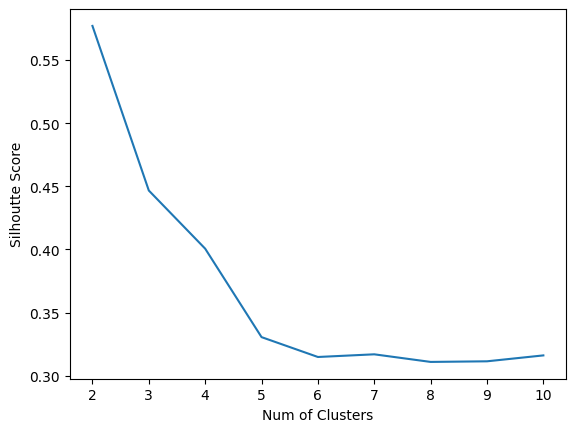

In [32]:
#plotting silloutte score
plt.plot(range(2,11),sillhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Num of Clusters")
plt.ylabel("Silhoutte Score")
plt.show()